## Implementing Regression Using K-NN Regressor

## Load the necessary libraries

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
plt.style.use("ggplot")

## Load the dataset

In [7]:
df = pd.read_csv("auto-mpg.csv", na_values="?")

## Expolring the dataset

In [8]:
# Print first 5 rows

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [9]:
# Let's observe the shape of the dataframe

df.shape

(398, 9)

In [10]:
# Let's find out missing values

df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [11]:
# Let's drop missing data

df.dropna(inplace=True)

In [12]:
# Let's find out missing values

df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [14]:
# Let's observe data visually

sns.pairplot(df)

In [15]:
## Let's observe correlation 

df.corr()

C:\Users\Administrator.LAB-STUDENT\AppData\Local\Temp\ipykernel_11348\4268503223.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [8]:
# Traget column: Outcome
#       classes: 1. 0 - Non-diabetic
#                2. 1 - Diabetic

# Features (Pregnancies	Glucose	BloodPressure	SkinThickness	Insulin	BMI	DiabetesPedigreeFunction	Age)

## Extracting Feature array and Target column

In [16]:
X = df.drop(columns=['mpg','car name'])
y = df['mpg']

In [17]:
X

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130.0,3504,12.0,70,1
1,8,350.0,165.0,3693,11.5,70,1
2,8,318.0,150.0,3436,11.0,70,1
3,8,304.0,150.0,3433,12.0,70,1
4,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,1
394,4,97.0,52.0,2130,24.6,82,2
395,4,135.0,84.0,2295,11.6,82,1
396,4,120.0,79.0,2625,18.6,82,1


In [18]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

## Splitting dataframe into Training & Testing sets

In [19]:
X_train,X_test,y_train,y_test = \
train_test_split(X,y,test_size=0.25,random_state=42)

In [20]:
print("Length of X: ", len(X))
print("Length of X_train: ", len(X_train))
print("Length of X_test: ", len(X_test))

Length of X:  392
Length of X_train:  294
Length of X_test:  98


## Creating Regressor

In [21]:
# Let's create K-NN Regressor using 5 Neighbours

regressor = KNeighborsRegressor(n_neighbors=5)

# Training the regressor

regressor.fit(X_train,y_train)

KNeighborsRegressor()

## Making Predictions using regressor

In [23]:
y_pred = regressor.predict(X_test)
y_pred[:10]

array([31.8 , 23.38, 33.52, 34.52, 23.64, 33.96, 12.2 , 27.04, 19.04,
       33.12])

## Evaluation Classifier

In [25]:
# Let's print the accuracy score of classifier

print("Score=", regressor.score(X_test,y_test))

Score= 0.6523504459837186


In [17]:
## Approx : 66%

## Finding best fit K value

In [36]:
error_rate = [] # list taht will store the average error rate value of K

for i in range(1,51):
    regressor = KNeighborsRegressor(n_neighbors=i)
    regressor.fit(X_train,y_train)
    predict_i = regressor.predict(X_test)
    error_rate.append(mean_squared_error(y_test,predict_i))

print(error_rate)    

[29.481734693877552, 20.359336734693876, 17.734807256235825, 18.773246173469385, 17.533048979591836, 17.324965986394556, 16.78148896293211, 17.175401785714286, 17.362547241118666, 17.58648775510204, 17.706921065947036, 17.055238095238092, 16.954387755102037, 16.932835276967932, 17.398735147392294, 16.901738281249997, 16.62757220535273, 16.921472348198545, 16.69957883430381, 16.739513520408156, 16.70731477625063, 16.635269016697592, 16.607390146985065, 16.54176197562358, 16.322120816326525, 16.54290725757759, 16.221964530668235, 16.257151187005412, 16.18335727632313, 16.50256678004535, 16.254922062477434, 16.343210200095665, 16.32784065141208, 16.43082815479133, 16.358122865472723, 16.38708286092215, 16.46313412143528, 16.27764698400136, 16.488610138335414, 16.6525475127551, 16.57649595114667, 16.573908383081125, 16.498802275913068, 16.28542076024624, 16.311482489292008, 16.42806961536978, 16.528374044955235, 16.52501758255385, 16.607291774685716, 16.55892971428571]


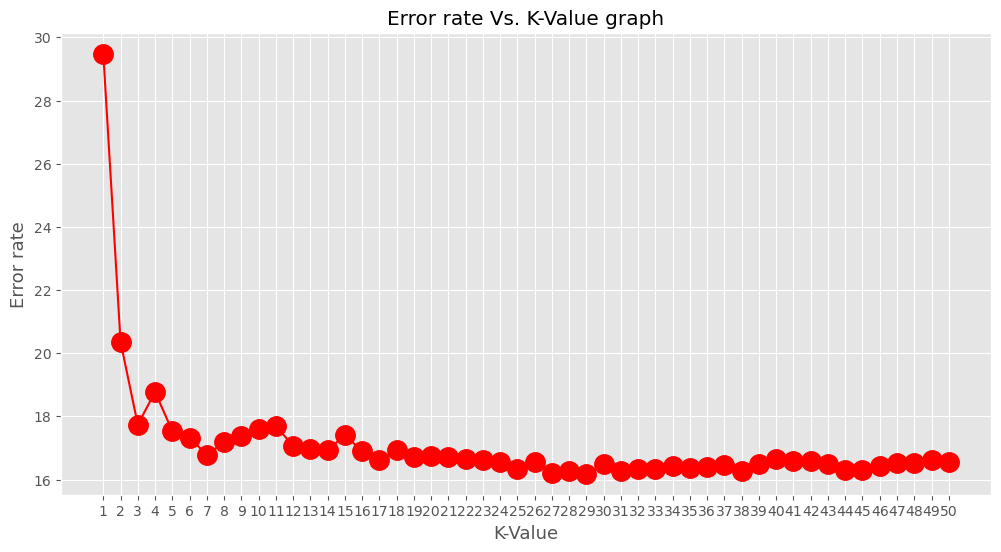

In [37]:
# Plotting the error rate vs k-graph

plt.figure(figsize=(12,6))
plt.plot(range(1,51), error_rate,marker="o",color="red",markersize=14)
plt.title("Error rate Vs. K-Value graph")
plt.xlabel("K-Value",fontsize=13)
plt.ylabel("Error rate",fontsize=13)
plt.xticks(range(1,51))
plt.show()

In [39]:
error_rate = [] # list taht will store the average error rate value of K

for i in range(1,51):
    regressor = KNeighborsRegressor(n_neighbors=i)
    regressor.fit(X_train,y_train)
    predict_i = regressor.predict(X_test)
    mae = mean_absolute_error(y_test,predict_i)
    error_rate.append(mae)

print(error_rate)    

[3.8479591836734697, 3.273469387755102, 2.9265306122448975, 3.0022959183673468, 2.9499999999999997, 3.0071428571428576, 2.9946064139941693, 3.0354591836734692, 3.043990929705215, 3.0940816326530616, 3.127365491651206, 3.075170068027211, 3.050784929356358, 3.043002915451895, 3.098979591836735, 3.061033163265306, 3.0291716686674666, 3.0535714285714284, 3.0315789473684207, 3.031071428571428, 3.0226919339164233, 3.016048237476809, 3.0166814551907715, 3.013180272108843, 2.9884897959183676, 3.0212715855573005, 2.9975434618291765, 3.0169096209912536, 3.014496833216045, 3.0436394557823125, 3.018531928900592, 3.0178252551020406, 3.0179653679653677, 3.0456182472989197, 3.0558309037900875, 3.062585034013606, 3.0599558742415884, 3.0398496240601505, 3.067111459968603, 3.0807908163265303, 3.0720009955201597, 3.0702866861030125, 3.0649027052681537, 3.049373840445268, 3.0674376417233558, 3.0691659272404617, 3.087603126356926, 3.0841624149659865, 3.1050812161599324, 3.1031428571428568]


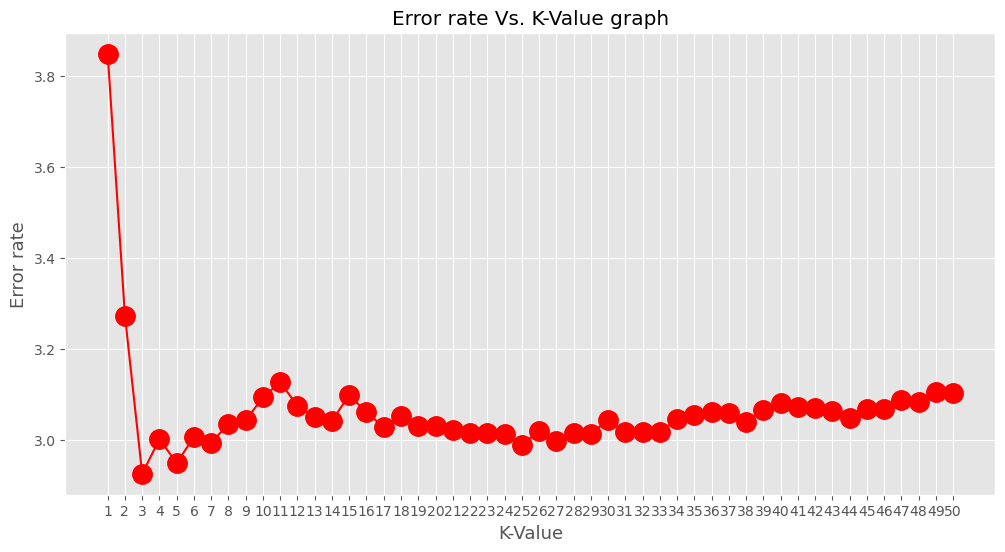

In [40]:
# Plotting the error rate vs k-graph

plt.figure(figsize=(12,6))
plt.plot(range(1,51), error_rate,marker="o",color="red",markersize=14)
plt.title("Error rate Vs. K-Value graph")
plt.xlabel("K-Value",fontsize=13)
plt.ylabel("Error rate",fontsize=13)
plt.xticks(range(1,51))
plt.show()